In [2]:
import numpy as np

In [61]:
class vanillaGrad(object):
    def __init__(self,weight_shape, learning_rate=0.1, loss_function="MSE"):
        self.weights = np.array(np.random.randn(weight_shape), ndmin=2)
        self.lr = learning_rate
        self.loss = loss_function
        self.history = {}

    def update_w(self, X, y):
        """ The default loss function is the preferred Mean Squared error, the other alternative is the MAE"""
        dl_dw = 0
        
        
        N = len(X)
            #looping over all the training data
        for i in range(N):
            x = np.array(X[i], ndmin=2).T
            np.dot(self.weights, x)  

            if self.loss == "MSE":                            
                dl_dw += (-2 *x * (y[i] - np.dot(self.weights, x)))
            #to use absolute loss function in future 
            else:
                 print("Only MSE allowed for now")
                
        #update the weight matrix
        #dividing by N to average the loss
        self.weights -= 1/N * (self.lr * dl_dw.T)

        return self.weights

    def average_loss(self, X, y):
            X = np.array(X, ndmin=2)
            total_error = 0.0
            N = len(X)
            for i in range(N):
                x = X[i].T
                if self.loss == "MSE":
                    total_error += (y[i] - np.dot(self.weights, x)) **2
                #to use absolute loss funct in future
                else:
                     print("Only MSE allowed for now")

        
    def train(self, X, y, epochs):
        for epoch in range(epochs):
                #update the weights
                self.update_w(X, y)
                #calculate the loss for the epoch 
                self.history[epoch] = self.average_loss(X, y)

                print(f"Epoch {epoch} / {epochs}: loss {self.history[epoch]}")
    
    def test(self, X,y):
         #return the MSE
         MSE = self.average_loss(X, y)
         return MSE
              
              

In [59]:
#generating data 
X = np.random.rand(500, 3)
y = []
# y = 2x1 + 3x2
for x in X:
    y.append(2*x[0] + 3*x[1] + x[2])

#split the dataset into train and test set 
X_train, X_test, y_train, y_test = X[:70], X[70:], y[:70], y[70:]

In [68]:
#create instance of the model
network = vanillaGrad(3, 0.3, "MSE")

In [69]:
#train the model
network.train(X_train, y_train, epochs=100)
network.weights


Epoch 0 / 100: loss [0.82778796]
Epoch 1 / 100: loss [0.22145824]
Epoch 2 / 100: loss [0.06352509]
Epoch 3 / 100: loss [0.02204425]
Epoch 4 / 100: loss [0.01083445]
Epoch 5 / 100: loss [0.00751865]
Epoch 6 / 100: loss [0.00628459]
Epoch 7 / 100: loss [0.00562073]
Epoch 8 / 100: loss [0.00513225]
Epoch 9 / 100: loss [0.00471447]
Epoch 10 / 100: loss [0.00433821]
Epoch 11 / 100: loss [0.00399402]
Epoch 12 / 100: loss [0.00367775]
Epoch 13 / 100: loss [0.00338677]
Epoch 14 / 100: loss [0.00311894]
Epoch 15 / 100: loss [0.00287239]
Epoch 16 / 100: loss [0.00264541]
Epoch 17 / 100: loss [0.00243644]
Epoch 18 / 100: loss [0.00224404]
Epoch 19 / 100: loss [0.00206689]
Epoch 20 / 100: loss [0.00190379]
Epoch 21 / 100: loss [0.0017536]
Epoch 22 / 100: loss [0.0016153]
Epoch 23 / 100: loss [0.00148795]
Epoch 24 / 100: loss [0.00137068]
Epoch 25 / 100: loss [0.00126268]
Epoch 26 / 100: loss [0.00116322]
Epoch 27 / 100: loss [0.00107162]
Epoch 28 / 100: loss [0.00098726]
Epoch 29 / 100: loss [0.00

array([[2.00188154, 2.99444531, 1.00341172]])

In [70]:
#test the nodel
network.test(X_train, y_train), network.test(X_test, y_test)

(array([3.04593476e-06]), array([3.83270629e-06]))

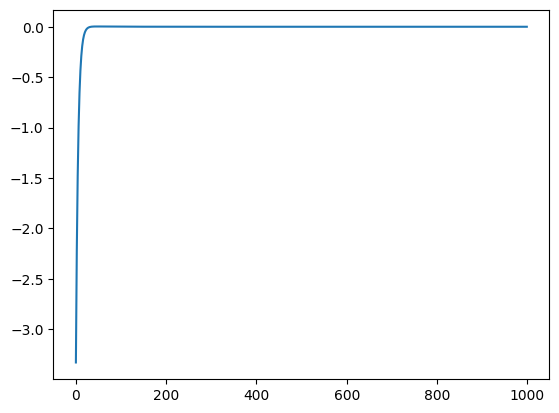

In [178]:
import matplotlib.pyplot as plt 
plt.plot(network.history.keys(), network.history.values())